### Initial Analysis





The most artist that had the most amount of songs was "The Karaoke Channel" (46), who was also the artist that stayed on the rankings for longer (29 years with special focus on 1970s and 1980s). Madonna had the biggest number of songs (30), followed by Elvis Presley, Janet Jackson, Taylor Swift, The Beatlers and  Elton John. Stevie Wonder and Elton Jones were in the rankings for longer.



In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/billboard_top_100_1946_2022_lyrics.csv')

In [ ]:
# Analyze the frequency of each artist
artist_frequency = df['Artist Names'].value_counts()
artist_yearly_counts = df.groupby(['Artist Names', 'Hot100 Ranking Year']).size().reset_index(name='Count')

# Format top 10 as "Artist (frequency)"
top_10 = [f"{artist} ({count})" for artist, count in artist_frequency.head(10).items()]

# Join into a single string
result = ", ".join(top_10)

print(result)

['the karaoke channel'] (46), ['madonna'] (30), ['elvis presley'] (28), ['janet jackson'] (26), ['taylor swift'] (26), ['the beatles'] (25), ['elton john'] (25), ['stevie wonder'] (24), ['mariah carey'] (24), ['rihanna'] (21)


In [ ]:
# Group by artist and count the number of unique years they appear in
years_per_artist = artist_yearly_counts.groupby('Artist Names')['Hot100 Ranking Year'].nunique()

# Sort the results in descending order and get the top 3
top_3_artists_by_years = years_per_artist.sort_values(ascending=False).head(3)

print("Top 3 artists with songs in the most amount of years:")
display(top_3_artists_by_years)

Top 3 artists with songs in the most amount of years:


,Hot100 Ranking Year
Artist Names,
['the karaoke channel'],29
['stevie wonder'],18
['elton john'],17


Words

Frequency of "I" vs "We" vs "You"

Find: "I" and "You" has significant higher increses than "We"


In [ ]:
import ast

# Convert the string representation of list to actual list in 'Lyrics' column
df['Lyrics'] = df['Lyrics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create new columns for word counts and initialize with 0
df['we_count'] = 0
df['i_count'] = 0
df['you_count'] = 0

# Function to count words
def count_words(lyrics):
    we_count = 0
    i_count = 0
    you_count = 0
    if isinstance(lyrics, list):
        for word in lyrics:
            word_lower = str(word).lower() # Ensure word is treated as string
            if word_lower == 'we':
                we_count += 1
            elif word_lower == 'i':
                i_count += 1
            elif word_lower == 'you':
                you_count += 1
    return we_count, i_count, you_count

# Apply the function to each row
df[['we_count', 'i_count', 'you_count']] = df['Lyrics'].apply(lambda x: pd.Series(count_words(x)))

# Display the first few rows with new columns
display(df.head())

,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics,we_count,i_count,you_count
0,Prisoner of Love - Remastered - 1992,['perry como'],1946,1,"[someone, that, i, belong, to, doesnt, belong,...",0,9,0
1,To Each His Own,['eddy howard'],1946,2,"[a, rose, must, remain, with, the, sun, and, t...",0,3,6
2,The Gypsy,['the ink spots'],1946,3,"[in, a, quaint, caravan, theres, a, lady, they...",0,2,2
3,Five Minutes More,['frank sinatra'],1946,4,"[dear, this, evening, seemed, to, go, so, awfu...",1,4,4
4,Rumors Are Flying,['frankie carle'],1946,5,"[rumors, are, flying, that, youve, got, me, si...",0,2,7


In [ ]:
yearly_word_counts = df.groupby('Hot100 Ranking Year')[['we_count', 'i_count', 'you_count']].sum().reset_index()
display(yearly_word_counts.head())

,Hot100 Ranking Year,we_count,i_count,you_count
0,1946,13,121,147
1,1947,20,205,226
2,1948,30,128,116
3,1949,19,88,108
4,1950,5,139,113


In [ ]:
# Calculate the total number of songs per year
total_songs_per_year = df['Hot100 Ranking Year'].value_counts().reset_index()
total_songs_per_year.columns = ['Hot100 Ranking Year', 'total_songs']

# Merge total songs per year with yearly word counts
yearly_word_counts = pd.merge(yearly_word_counts, total_songs_per_year, on='Hot100 Ranking Year')

# Calculate normalized frequencies
yearly_word_counts['we_frequency'] = yearly_word_counts['we_count'] / yearly_word_counts['total_songs']
yearly_word_counts['i_frequency'] = yearly_word_counts['i_count'] / yearly_word_counts['total_songs']
yearly_word_counts['you_frequency'] = yearly_word_counts['you_count'] / yearly_word_counts['total_songs']

# Display the first few rows of the updated DataFrame
display(yearly_word_counts.head())

,Hot100 Ranking Year,we_count,i_count,you_count,total_songs,we_frequency,i_frequency,you_frequency
0,1946,13,121,147,41,0.317073,2.951220,3.585366
1,1947,20,205,226,47,0.425532,4.361702,4.808511
2,1948,30,128,116,39,0.769231,3.282051,2.974359
3,1949,19,88,108,30,0.633333,2.933333,3.600000
4,1950,5,139,113,30,0.166667,4.633333,3.766667


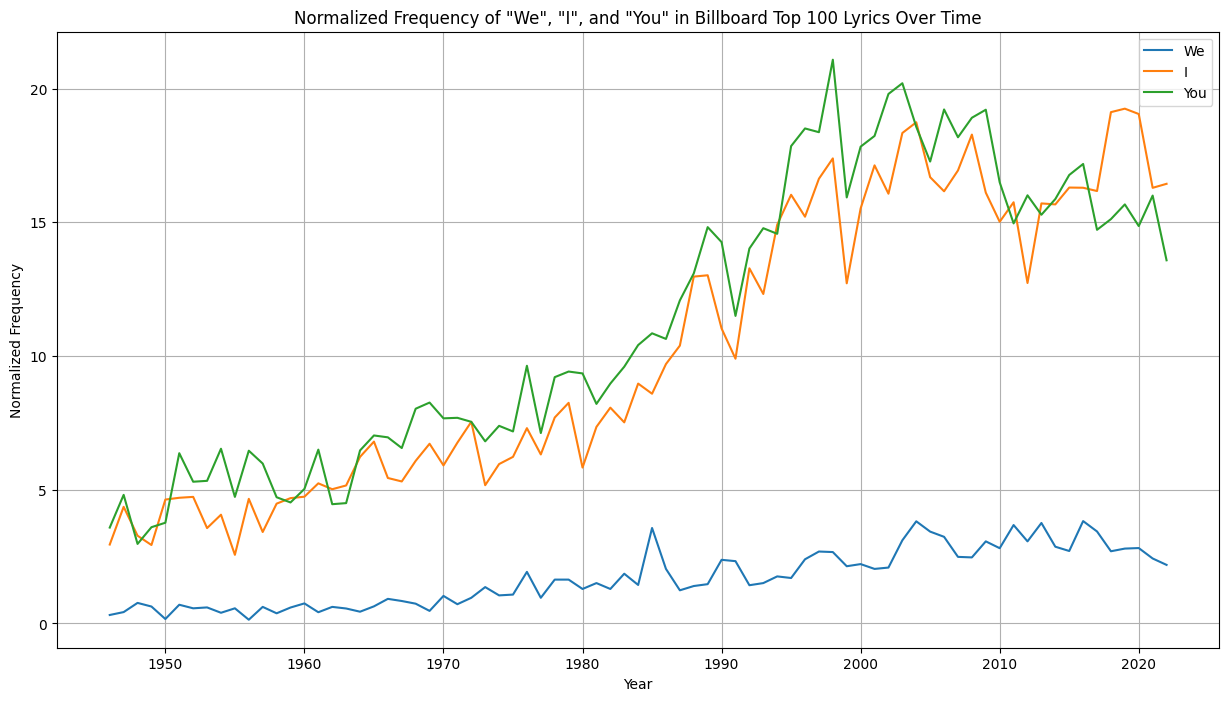

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(yearly_word_counts['Hot100 Ranking Year'], yearly_word_counts['we_frequency'], label='We')
plt.plot(yearly_word_counts['Hot100 Ranking Year'], yearly_word_counts['i_frequency'], label='I')
plt.plot(yearly_word_counts['Hot100 Ranking Year'], yearly_word_counts['you_frequency'], label='You')
plt.xlabel('Year')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequency of "We", "I", and "You" in Billboard Top 100 Lyrics Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Sentiment Analysis



In [ ]:
# We will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment intensity analyzer from the NLTK library.
# VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media,
# and it performs well on a variety of text types, including song lyrics. It is also readily available in NLTK and relatively easy to use.
# Although Hugging Face Transformers offers more complex models, VADER is sufficient for this initial trend analysis and is less computationally intensive.

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

print("VADER sentiment analyzer selected and initialized.")

VADER sentiment analyzer selected and initialized.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import re

# Convert 'Lyrics' column to string type, handling potential non-string values
df['Lyrics'] = df['Lyrics'].apply(lambda x: str(x) if x is not None else '')

# Function to clean the text
def clean_lyrics(lyrics):
    # Convert to lowercase
    lyrics = lyrics.lower()
    # Remove non-alphabetic characters and spaces
    lyrics = re.sub(r'[^a-z\s]', '', lyrics)
    # Remove extra spaces
    lyrics = re.sub(r'\s+', ' ', lyrics).strip()
    return lyrics

# Apply the cleaning function to the 'Lyrics' column
df['cleaned_lyrics'] = df['Lyrics'].apply(clean_lyrics)

# Define a function to get the compound sentiment score
def get_sentiment_score(lyrics):
    if not lyrics:
        return 0.0  # Return 0 for empty lyrics
    return analyzer.polarity_scores(lyrics)['compound']

# Apply the function to the 'cleaned_lyrics' column
df['sentiment_score'] = df['cleaned_lyrics'].apply(get_sentiment_score)

# Display the first few rows with the new 'sentiment_score' column
display(df[['cleaned_lyrics', 'sentiment_score']].head())

,cleaned_lyrics,sentiment_score
0,someone that i belong to doesnt belong to me s...,0.8742
1,a rose must remain with the sun and the rain o...,0.4366
2,in a quaint caravan theres a lady they call th...,0.9139
3,dear this evening seemed to go so awfully fast...,0.8494
4,rumors are flying that youve got me sighing th...,0.9701


In [ ]:
yearly_sentiment = df.groupby('Hot100 Ranking Year')['sentiment_score'].mean().reset_index()
display(yearly_sentiment.head())

,Hot100 Ranking Year,sentiment_score
0,1946,0.502463
1,1947,0.515981
2,1948,0.309426
3,1949,0.385237
4,1950,0.518590


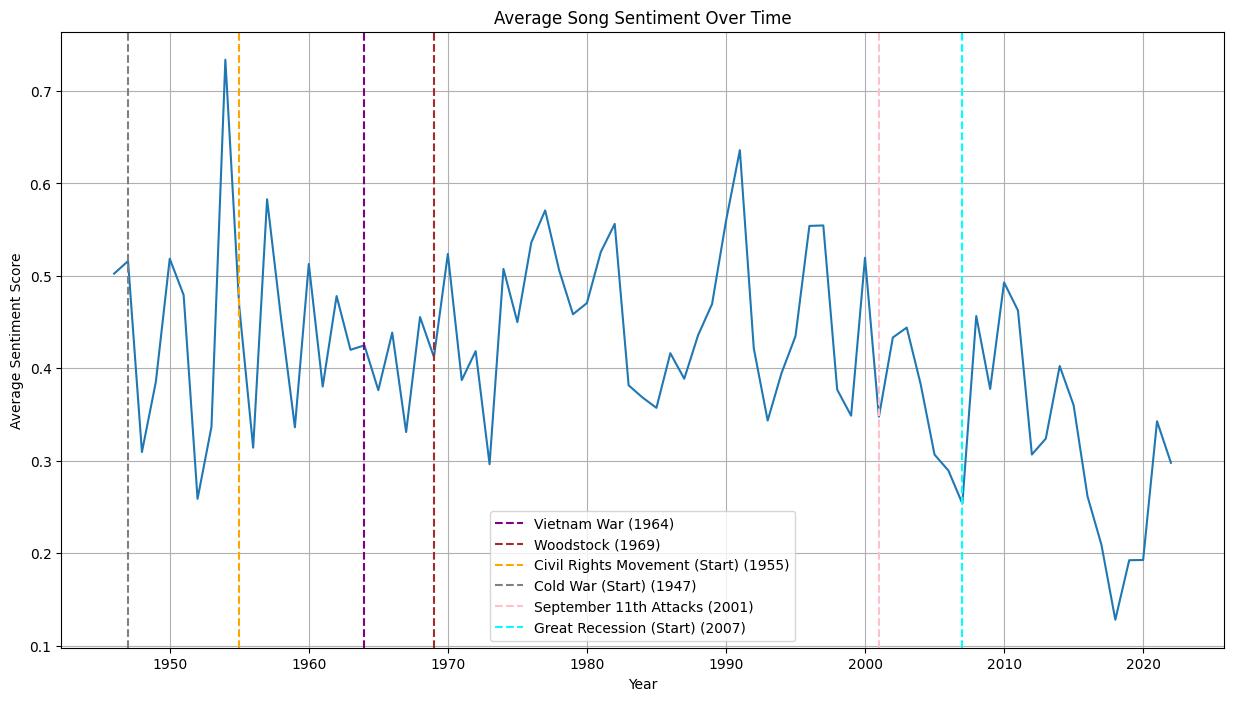

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(yearly_sentiment['Hot100 Ranking Year'], yearly_sentiment['sentiment_score'])
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Average Song Sentiment Over Time')
plt.grid(True)

# --- Code to add event markers ---
major_us_events = {
    1964: 'Vietnam War',
    1969: 'Woodstock',
    1955: 'Civil Rights Movement (Start)',
    1947: 'Cold War (Start)',
    2001: 'September 11th Attacks',
    2007: 'Great Recession (Start)'
}

colors = ['purple', 'brown', 'orange', 'gray', 'pink', 'cyan'] # Define a list of colors

for i, (event_year, event_name) in enumerate(major_us_events.items()):
    plt.axvline(x=event_year, color=colors[i % len(colors)], linestyle='--', label=f'{event_name} ({event_year})')
# --- End of code to add event markers ---

plt.legend() # Add legend to show event labels
plt.show()

In [ ]:
# Verify the yearly_sentiment DataFrame
if 'yearly_sentiment' in locals() and isinstance(yearly_sentiment, pd.DataFrame):
    print("yearly_sentiment DataFrame is available.")
    if all(col in yearly_sentiment.columns for col in ['Hot100 Ranking Year', 'sentiment_score']):
        print("yearly_sentiment DataFrame contains the required columns.")
    else:
        print("yearly_sentiment DataFrame is missing required columns.")
else:
    print("yearly_sentiment DataFrame is not available.")

# Define the historical events
historical_events = {
    1914: 'World War 1 (Start)',
    1939: 'World War 2 (Start)',
    1964: 'Vietnam War (Start)',
    1969: 'Woodstock'
}

print("\nHistorical events defined:")
display(historical_events)

yearly_sentiment DataFrame is available.
yearly_sentiment DataFrame contains the required columns.

Historical events defined:


{1914: 'World War 1 (Start)',
 1939: 'World War 2 (Start)',
 1964: 'Vietnam War (Start)',
 1969: 'Woodstock'}

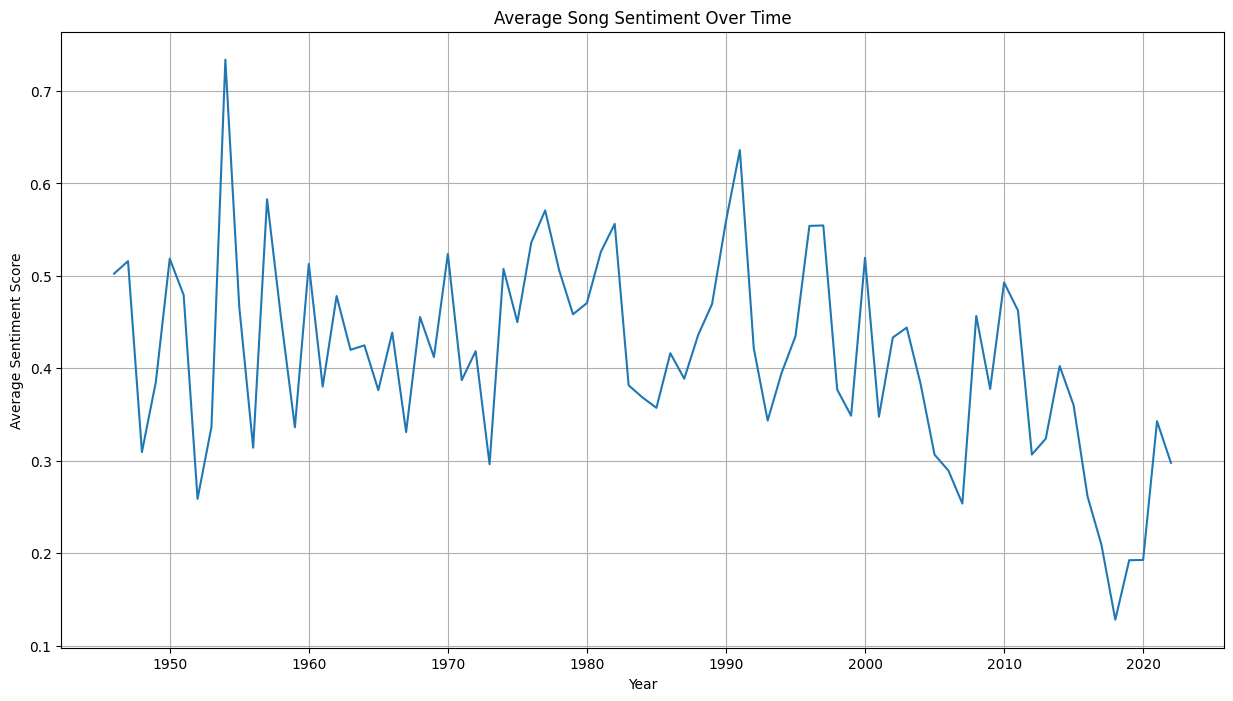

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(yearly_sentiment['Hot100 Ranking Year'], yearly_sentiment['sentiment_score'])
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Average Song Sentiment Over Time')
plt.grid(True)
plt.show()

/tmp/ipython-input-4184134018.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f"{event_info['name']} ({year})",


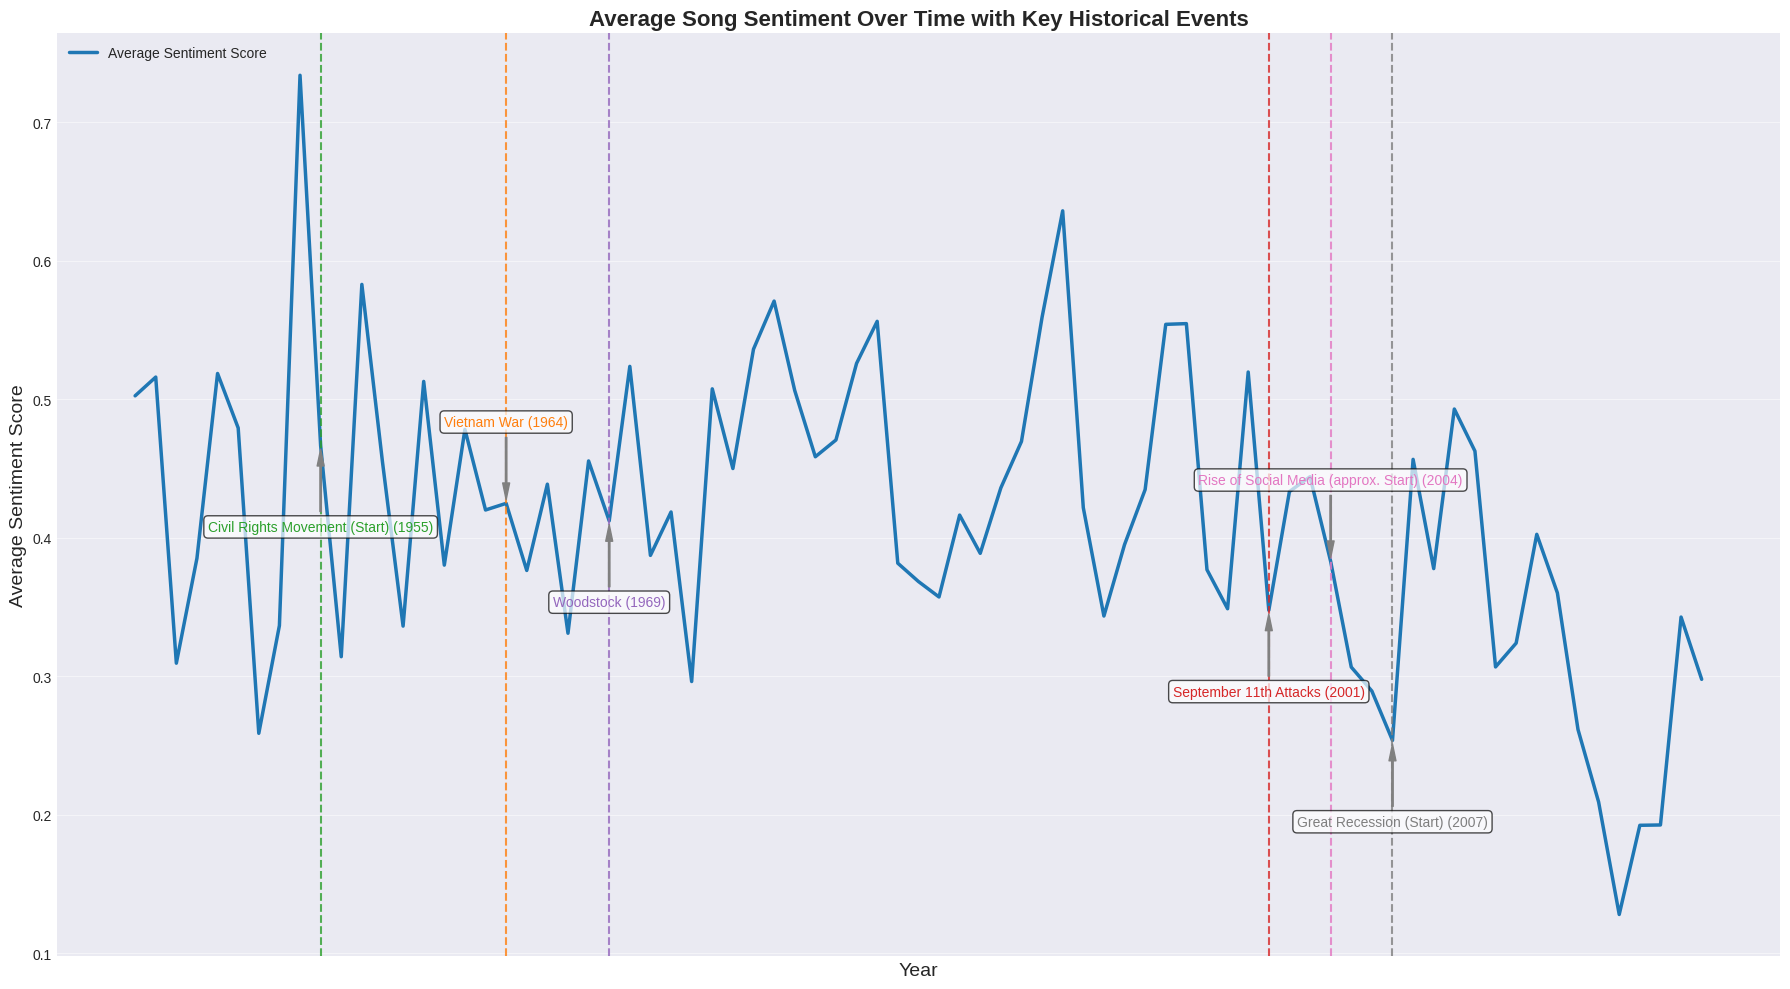

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd # Import pandas

plt.style.use('seaborn-v0_8-darkgrid') # Use a seaborn style for a modern look

plt.figure(figsize=(18, 10)) # Increase figure size for better readability

# Plot the sentiment score line
plt.plot(yearly_sentiment['Hot100 Ranking Year'], yearly_sentiment['sentiment_score'], label='Average Sentiment Score', color='#1f77b4', linewidth=2.5) # Use a modern color and thicker line

plt.xlabel('Year', fontsize=14) # Increase font size for axis labels
plt.ylabel('Average Sentiment Score', fontsize=14) # Increase font size for axis labels
plt.title('Average Song Sentiment Over Time with Key Historical Events', fontsize=16, fontweight='bold') # Update title and make it bold
plt.grid(True, linestyle='-', alpha=0.5) # Improve grid visibility

# Define the historical events with more details for annotations
historical_events = {
    1964: {'name': 'Vietnam War', 'color': '#ff7f0e'},
    1969: {'name': 'Woodstock', 'color': '#9467bd'},
    1955: {'name': 'Civil Rights Movement (Start)', 'color': '#2ca02c'},
    2004: {'name': 'Rise of Social Media (approx. Start)', 'color': '#e377c2'}, # Added Rise of Social Media
    2001: {'name': 'September 11th Attacks', 'color': '#d62728'},
    2007: {'name': 'Great Recession (Start)', 'color': '#7f7f7f'}

}

# Add vertical lines and annotations for historical events
for year, event_info in historical_events.items():
    plt.axvline(x=year, color=event_info['color'], linestyle='--', alpha=0.8, linewidth=1.5) # Add vertical line with different colors

    sentiment_at_year = yearly_sentiment.loc[yearly_sentiment['Hot100 Ranking Year'] == year, 'sentiment_score'].mean()

    # Adjust annotation position based on the year and sentiment value for better readability
    y_pos = sentiment_at_year if pd.notna(sentiment_at_year) else yearly_sentiment['sentiment_score'].median()
    annotation_y_offset = yearly_sentiment['sentiment_score'].std() * 0.5 # Use standard deviation to determine offset

    # Alternate annotation vertical alignment
    va = 'bottom' if year % 2 == 0 else 'top'
    y_text = y_pos + annotation_y_offset if va == 'bottom' else y_pos - annotation_y_offset


    plt.annotate(f"{event_info['name']} ({year})",
                 xy=(year, y_pos), # Position annotation base at the year and sentiment
                 xytext=(year, y_text), # Offset text position
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5, color='gray'), # Adjust arrow properties and color
                 horizontalalignment='center', # Center the annotation text
                 verticalalignment=va,
                 fontsize=10,
                 color=event_info['color'], # Match annotation color to line color
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7)) # Add a semi-transparent background box


# Improve x-axis ticks for better timeline look
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10)) # Set major ticks every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format ticks as year
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.legend(loc='upper left', fontsize=10) # Add legend and position it
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Lets plot it agains the GDP now:

In [ ]:
import pandas as pd
# You might need to adjust the file path based on where your file is located
try:
    gdp_df = pd.read_csv('/content/gdp_per_capita.csv')
    print("GDP data loaded successfully.")
    display(gdp_df.head())
except FileNotFoundError:
    print("Error: 'gdp_per_capita.csv' not found. Please check the file path.")

GDP data loaded successfully.


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [ ]:
# Assuming gdp_df is already loaded

# Filter the DataFrame to include only rows where 'Country Name' is 'United States'
us_gdp_df = gdp_df[gdp_df['Country Name'] == 'United States'].copy()

# Display the first few rows of the filtered DataFrame to verify
display(us_gdp_df.head())

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
251,United States,USA,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,3827.52711,4146.316646,4336.426587,...,51602.931046,53106.536767,55049.988327,56863.371496,58021.4005,60109.655726,63064.41841,65279.529026,63593.443621,NaN


,Hot100 Ranking Year,sentiment_score,GDP_per_Capita
0,1946,0.502463,NaN
1,1947,0.515981,NaN
2,1948,0.309426,NaN
3,1949,0.385237,NaN
4,1950,0.518590,NaN


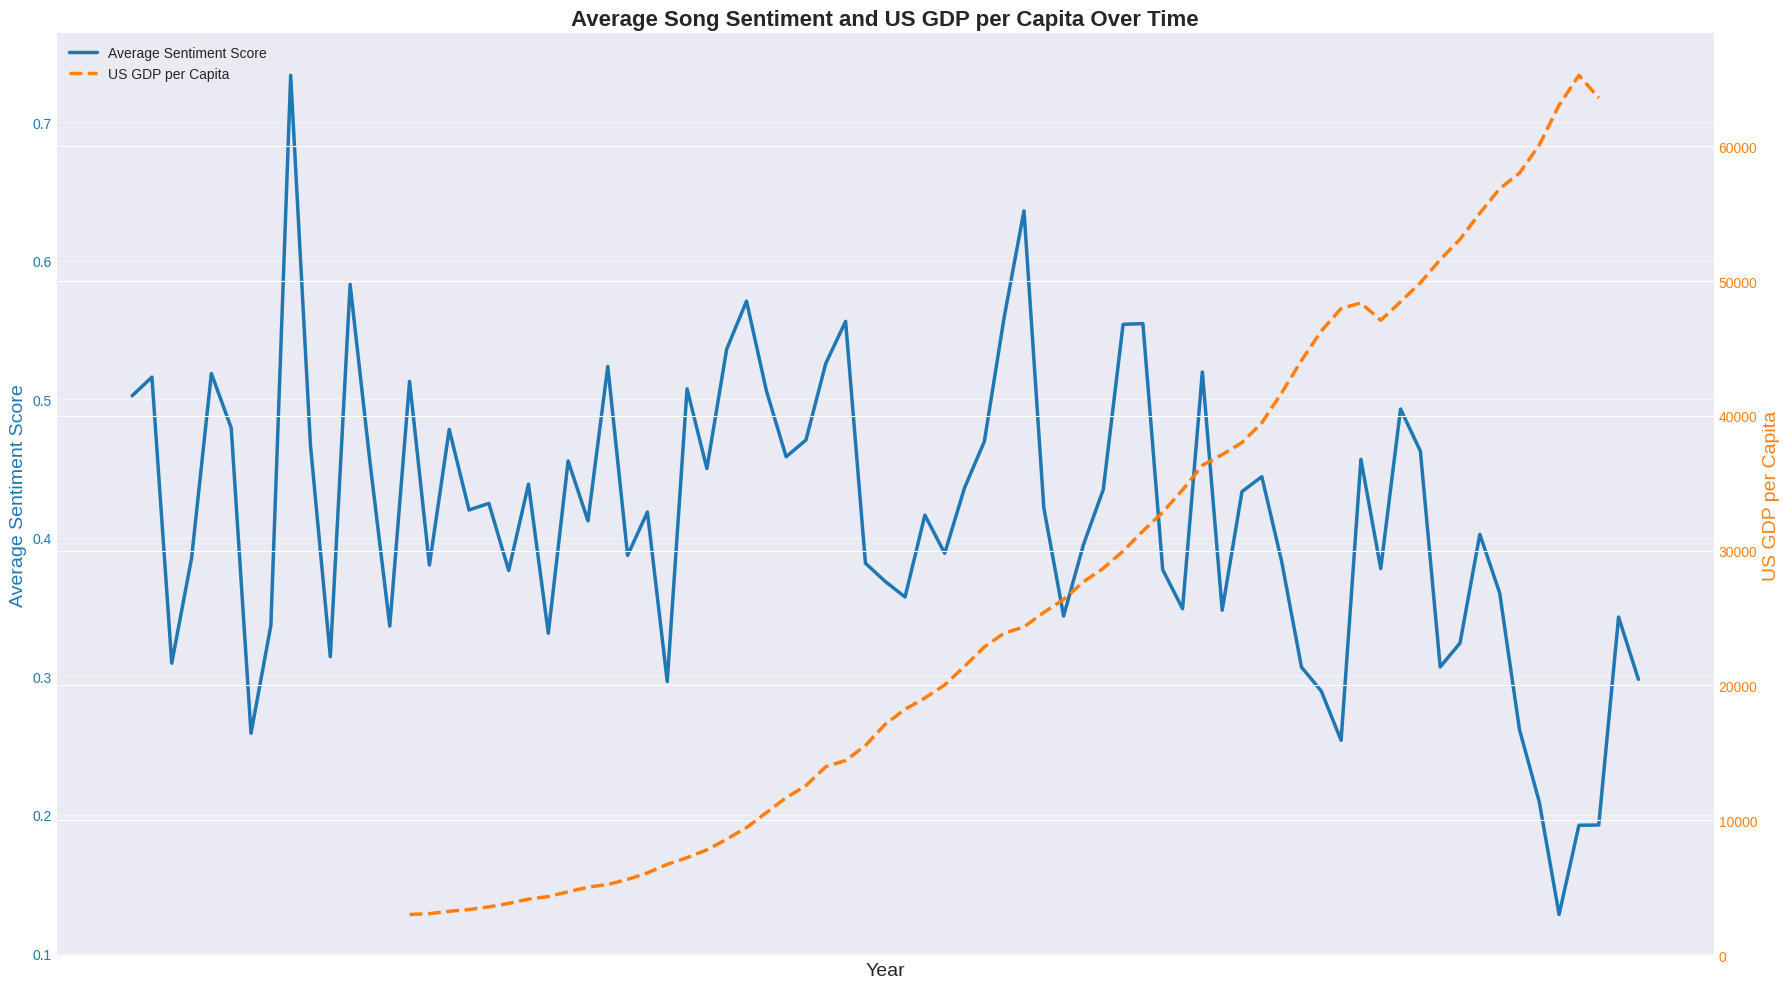

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming us_gdp_df and yearly_sentiment are already available

# Reshape the us_gdp_df from wide to long format for easier plotting over time
# Filtering based on Country Name only
us_gdp_long = us_gdp_df.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP_per_Capita')

# Convert Year to numeric, coercing errors to NaN and drop NaNs
us_gdp_long['Year'] = pd.to_numeric(us_gdp_long['Year'], errors='coerce')
us_gdp_long.dropna(subset=['Year', 'GDP_per_Capita'], inplace=True)

# Ensure Year is integer type for merging
us_gdp_long['Year'] = us_gdp_long['Year'].astype(int)

# Filter GDP data for the years present in the sentiment data (1946-2022)
# Assuming yearly_sentiment covers this range based on previous plots
min_year = yearly_sentiment['Hot100 Ranking Year'].min()
max_year = yearly_sentiment['Hot100 Ranking Year'].max()
us_gdp_filtered = us_gdp_long[(us_gdp_long['Year'] >= min_year) & (us_gdp_long['Year'] <= max_year)].copy()


# Merge with yearly_sentiment data
# Assuming yearly_sentiment is already available from previous steps
merged_df_gdp = pd.merge(yearly_sentiment, us_gdp_filtered[['Year', 'GDP_per_Capita']], left_on='Hot100 Ranking Year', right_on='Year', how='left')
merged_df_gdp.drop('Year', axis=1, inplace=True) # Drop the redundant 'Year' column from GDP data

# Display the merged dataframe head to verify
display(merged_df_gdp.head())

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(18, 10))

# Plot sentiment on the first y-axis
ax1.plot(merged_df_gdp['Hot100 Ranking Year'], merged_df_gdp['sentiment_score'], color='#1f77b4', linewidth=2.5, label='Average Sentiment Score')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Sentiment Score', color='#1f77b4', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, linestyle='-', alpha=0.5)


# Create a second y-axis for GDP per capita
ax2 = ax1.twinx()
# Use the merged_df_gdp which contains both sentiment and GDP data aligned by year
ax2.plot(merged_df_gdp['Hot100 Ranking Year'], merged_df_gdp['GDP_per_Capita'], color='#ff7f0e', linewidth=2.5, label='US GDP per Capita', linestyle='--')
ax2.set_ylabel('US GDP per Capita', color='#ff7f0e', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Add title and improve x-axis
plt.title('Average Song Sentiment and US GDP per Capita Over Time', fontsize=16, fontweight='bold')

# Code to ensure years are displayed on the bottom x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator(10)) # Set major ticks every 10 years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format ticks as year
ax1.xaxis.set_minor_locator(mdates.YearLocator(5)) # Set minor ticks every 5 years for better granularity

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

ax1.xaxis.set_major_locator(mdates.YearLocator(10)) # Set major ticks every 10 years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format ticks as year
ax1.xaxis.set_minor_locator(mdates.YearLocator(5)) # Set minor ticks every 5 years for better granularity

plt.tight_layout()
plt.show()